# GDP PER CAPITA  - A SHORT ANALYSIS   

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import the excel file

In [2]:
xls = pd.ExcelFile('E:\PythonRes\Datasets\gdp_per_capita_20.xlsx')
df1=pd.read_excel(xls,'Sheet1')
df2=pd.read_excel(xls,'Sheet2')
df3=pd.read_excel(xls,'Romania')

In [3]:
print(df1[0:3])
print('---------Transpose---------')
print(df1[0:3].T)

  TIME   2020
0   BE  33560
1   BG   6600
2   CZ  17340
---------Transpose---------
          0     1      2
TIME     BE    BG     CZ
2020  33560  6600  17340


In [4]:
df1.describe()

,2020
count,32.000000
mean,28044.375000
std,19277.556219
min,5410.000000
25%,13587.500000
50%,21365.000000
75%,36040.000000
max,81290.000000


In [5]:
print(df3[0:1])

      TIME  2014  2015  2016  2017  2018  2019  2020
0  Romania  7040  7290  7670  8280  8700  9110  8780


In [6]:
#sorting df1 ASC
df1.sort_values(by=['2020'], inplace=True)
print(df1)

   TIME   2020
30   RS   5410
1    BG   6600
22   RO   8780
10   HR  11500
31   TR  11600
13   LV  12130
16   HU  12640
20   PL  12680
14   LT  13890
5    EE  15010
24   SK  15090
7    EL  16300
21   PT  17200
2    CZ  17340
23   SI  19720
17   MT  20380
8    ES  22350
12   CY  23050
11   IT  24890
9    FR  30610
0    BE  33560
4    DE  34310
19   AT  35610
27   IS  36030
25   FI  36070
18   NL  40160
26   SW  42640
3    DK  48150
29   NO  60820
6    IE  62980
28   LI  68630
15   LU  81290


In [7]:
time1 = df1['TIME']
time2 = df2['TIME']

In [8]:
year1 = df1['2020']
year2 = df2['2019']

### Calculating the mean and median for df1 and df2

In [9]:
y_mean1 = [np.mean(year1) for i in time1]
y_mean2 = [np.mean(year2) for i in time2]
y_median2020 = [np.median(year1) for i in time1]

### Scatter plot -> GDP per capita 2019 and 2020

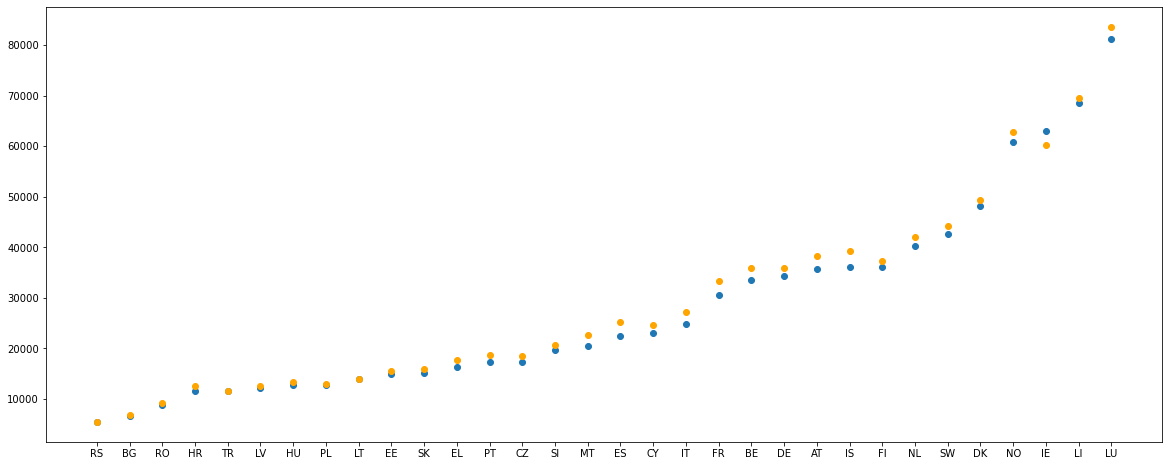

orange=GDP per capita 2019
blue=GDP per capita 2020


In [10]:
plt.figure(figsize=(20,8))
plt.scatter(time1,year1)
plt.scatter(time2,year2,color='orange')
plt.show()
print('orange=GDP per capita 2019')
print('blue=GDP per capita 2020')

### GDP per capita for 32 countries in Europe 
#### The data is ordered from lowest to highest value 

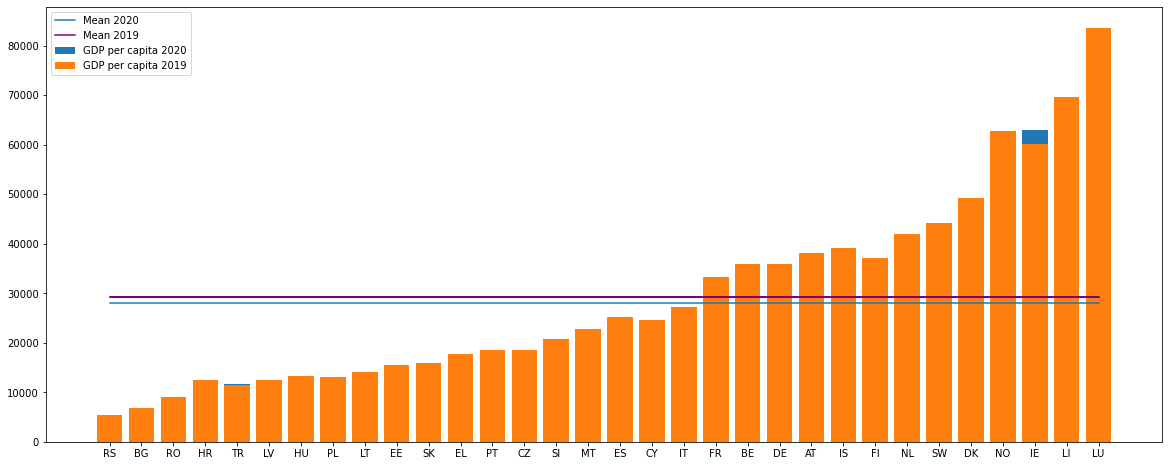

In [11]:
fig,ax = plt.subplots(figsize=(20,8))
scattered_data1 = ax.bar(time1,year1,label='GDP per capita 2020')
scattered_data2 = ax.bar(time2,year2,label='GDP per capita 2019')
mean_line1 = ax.plot(time1,y_mean1, label='Mean 2020')
mean_line2 = ax.plot(time2,y_mean2, label='Mean 2019', color='purple')
legend = ax.legend(loc='upper left')

       The average value of GDP per capita was lower in 2020 compared to 2019. The only two countries with a higher 
       GDP per capita in 2020 compared to 2019 were Turkey and Ireland.

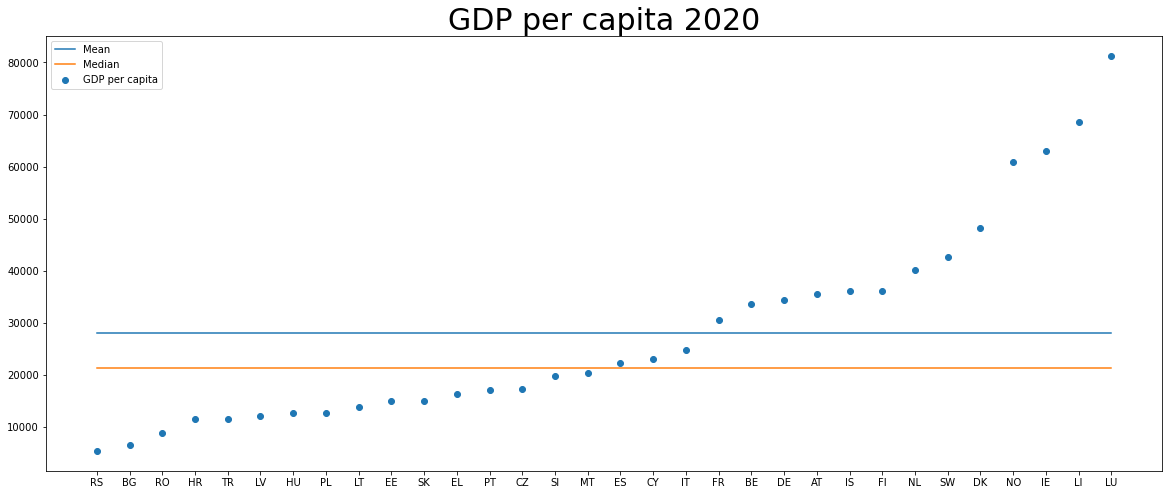

In [12]:
fig,ax = plt.subplots(figsize=(20,8))
scattered_data = ax.scatter(time1,year1,label='GDP per capita')
mean_line = ax.plot(time1,y_mean1, label='Mean')
median_line = ax.plot(time1,y_median2020, label='Median')
legend = ax.legend(loc='upper left')

plt.title(label='GDP per capita 2020', loc='center', fontdict={'fontsize':30})

plt.show()

In [13]:
#df1['zscore'] = (df1['2020']-df1.mean())/df1.std()
#print(df1)
new_df1 = df1.rename(columns = {'TIME':'CountryID','2020':'Value'}, inplace = False)
#print(new_df1.Value)
new_df1['zscore'] = (new_df1.Value - new_df1.Value.mean())/new_df1.Value.std()

In [14]:
new_df1.head()

,CountryID,Value,zscore
30,RS,5410,-1.174131
1,BG,6600,-1.112401
22,RO,8780,-0.999316
10,HR,11500,-0.858220
31,TR,11600,-0.853032


In [15]:
print('-------------Upper Outliers-------------------')
print(new_df1[new_df1['zscore']>2])
print('----------------------------------------------')
#print(new_df1[new_df1['zscore']<-1])
print('Lichtenstein and Luxembourg are the otliers of this analysis. ')

-------------Upper Outliers-------------------
   CountryID  Value    zscore
28        LI  68630  2.105330
15        LU  81290  2.762053
----------------------------------------------
Lichtenstein and Luxembourg are the otliers of this analysis. 


In [16]:
df1_without_outliers=new_df1[(new_df1.zscore<2)]

In [17]:
#print table with certain columns and without index
df1_without_outliers[['CountryID','Value']].style.hide_index()

CountryID,Value
RS,5410
BG,6600
RO,8780
HR,11500
TR,11600
LV,12130
HU,12640
PL,12680
LT,13890
EE,15010


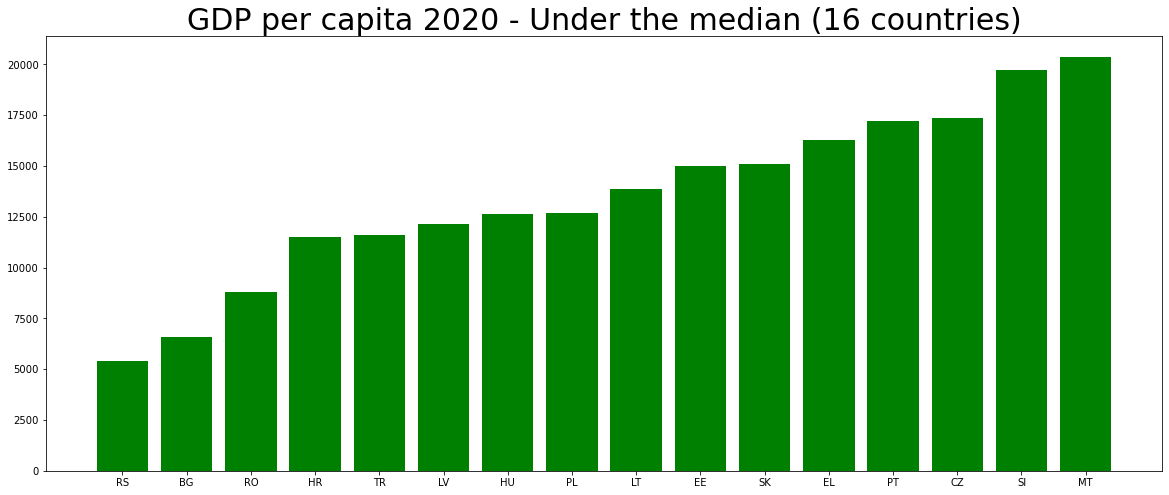

In [18]:
below_mean_df1 = new_df1.iloc[:16,:]
contry_id_df1 = below_mean_df1['CountryID']
value_df1 = below_mean_df1['Value']

plt.figure(figsize=(20,8))
plt.bar(contry_id_df1,value_df1, color='g')
#plt.plot(contry_id_df1,value_df1, color='r')

plt.title(label='GDP per capita 2020 - Under the median (16 countries)', loc='center', fontdict={'fontsize':30})

plt.show()

In [19]:
frames = [df1,df2]
concat = pd.concat(frames, axis=1, join='inner')
concat = concat.loc[:,~concat.columns.duplicated()]
df1df2 = concat.rename(columns = {'TIME':'CountryID'}, inplace = False)
value2020 = df1df2['2020']
value2019 = df1df2['2019']
column = df1df2["CountryID"]
df1df2

,CountryID,2020,2019
30,RS,5410,5450
1,BG,6600,6840
22,RO,8780,9110
10,HR,11500,12450
31,TR,11600,11500
13,LV,12130,12510
16,HU,12640,13270
20,PL,12680,13020
14,LT,13890,14010
5,EE,15010,15510


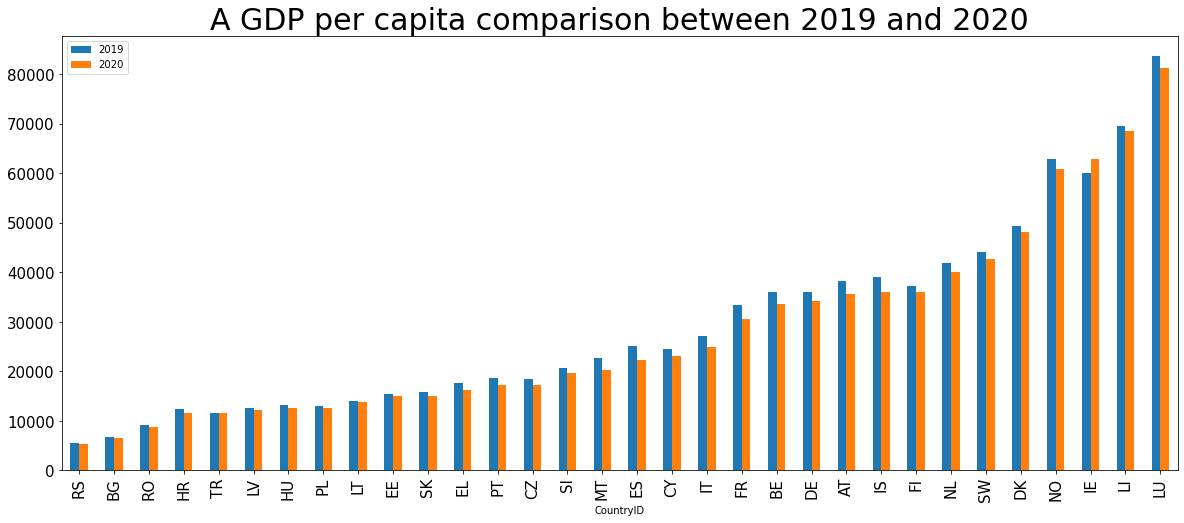

In [20]:
df1df2.plot(x="CountryID", y=['2019','2020'], kind='bar',figsize=(20,8), fontsize=15)
plt.title(label='A GDP per capita comparison between 2019 and 2020', loc='center', fontsize=30)
plt.show()

In [21]:
df1df2.describe()

,2020,2019
count,32.000000,32.000000
mean,28044.375000,29251.875000
std,19277.556219,19499.017748
min,5410.000000,5450.000000
25%,13587.500000,13825.000000
50%,21365.000000,23625.000000
75%,36040.000000,38417.500000
max,81290.000000,83640.000000


## The next line delets the 'TIME' cell from the table

In [22]:
df3.drop('TIME', axis='columns',inplace=True)

In [23]:
df3.index=['Romania']
print(df3)

         2014  2015  2016  2017  2018  2019  2020
Romania  7040  7290  7670  8280  8700  9110  8780


In [24]:
df3.loc['Romania']   #echivalent cu df3.iloc[0], ptr ca e primul rand
print(df3.loc['Romania'])
df3

2014    7040
2015    7290
2016    7670
2017    8280
2018    8700
2019    9110
2020    8780
Name: Romania, dtype: int64


,2014,2015,2016,2017,2018,2019,2020
Romania,7040,7290,7670,8280,8700,9110,8780


In [25]:
x = np.arange(2014,2021,1).tolist()
print(x)
list_values_y=pd.Index.tolist(df3.loc['Romania'])
print(list_values_y)

#reference year 2014
y = [ x for x in df3.loc['Romania']-df3.at['Romania','2014']]
print(y)

[2014, 2015, 2016, 2017, 2018, 2019, 2020]
[7040, 7290, 7670, 8280, 8700, 9110, 8780]
[0, 250, 630, 1240, 1660, 2070, 1740]


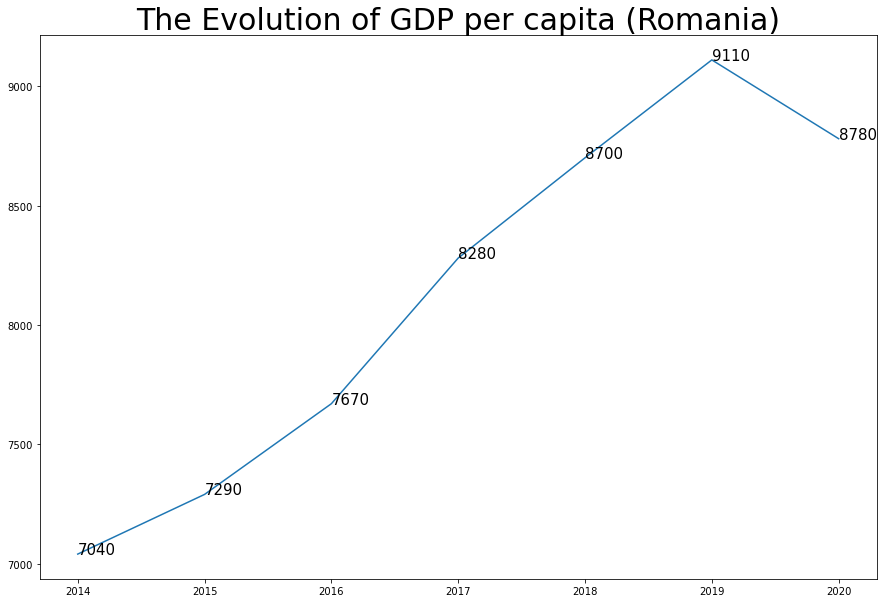

In [26]:
fig = plt.subplots(figsize=(15,10))
#plt.yticks(np.arange(y.min(), y.max()+100, 100))

# for line_value in df3.loc['Romania']:
#     plt.axhline(y=line_value,alpha=0.5, ls='--')
# for line_value in x:
#     plt.axvline(x=line_value,alpha=0.5, ls='--')

for i,j in zip(x,list_values_y):
    inplot = plt.annotate(str(j),xy=(i,j),fontsize=15,color='black')

plt.title(label='The Evolution of GDP per capita (Romania)', loc='center', fontdict={'fontsize':30})
plt.plot(x,list_values_y)
plt.show()

    As can be seen in the chart above, Romania's GDP per capita increased steadily between 2014 and 2019, followed  by a decline from 2019 to 2020(to almost the same GDP per capita value as in 2018). The highest level of GDP per capita in Romania was reached in 2019 with a value of 9110 euros

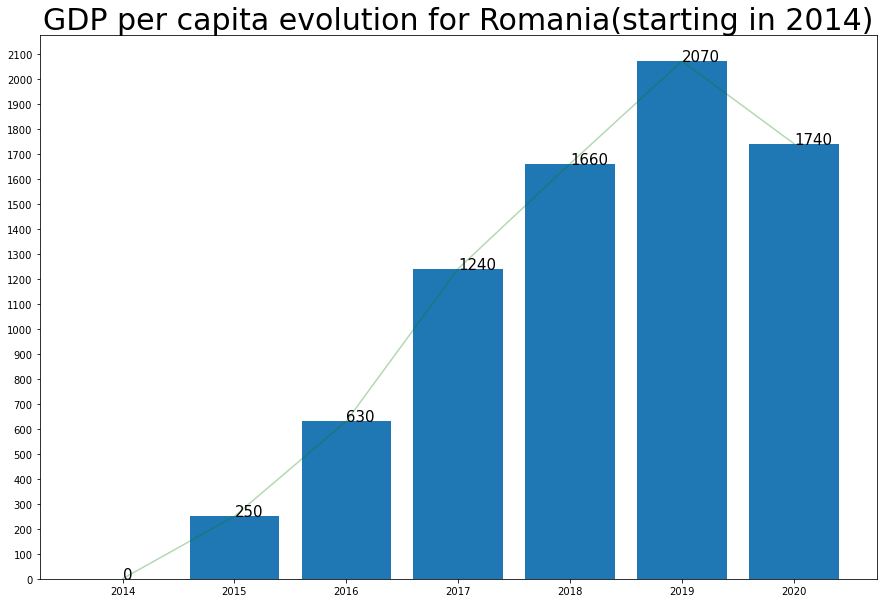

In [27]:
fig = plt.subplots(figsize=(15,10))
plt.yticks(np.arange(0, max(y)+100, 100))
plt.bar(x,y,bottom=0)
plt.plot(x,y,color='g',alpha=0.3)
#plt.axhline(y=250,alpha=0.5, ls='--')
plt.title(label='GDP per capita evolution for Romania(starting in 2014)', loc='center', fontdict={'fontsize':30})
for i,j in zip(x,y):
    inplot = plt.annotate(str(j),xy=(i,j),fontsize=15,color='black')
plt.show()

The highest increase in Romania's GDP per capita compared to 2014 was in 2019 (2070 euro)

In [28]:
df1df2['Total'] = df1df2['2020']-df1df2['2019']
print(df1df2)

   CountryID   2020   2019  Total
30        RS   5410   5450    -40
1         BG   6600   6840   -240
22        RO   8780   9110   -330
10        HR  11500  12450   -950
31        TR  11600  11500    100
13        LV  12130  12510   -380
16        HU  12640  13270   -630
20        PL  12680  13020   -340
14        LT  13890  14010   -120
5         EE  15010  15510   -500
24        SK  15090  15860   -770
7         EL  16300  17750  -1450
21        PT  17200  18630  -1430
2         CZ  17340  18460  -1120
23        SI  19720  20720  -1000
17        MT  20380  22720  -2340
8         ES  22350  25200  -2850
12        CY  23050  24530  -1480
11        IT  24890  27180  -2290
9         FR  30610  33320  -2710
0         BE  33560  35950  -2390
4         DE  34310  35980  -1670
19        AT  35610  38170  -2560
27        IS  36030  39160  -3130
25        FI  36070  37200  -1130
18        NL  40160  41980  -1820
26        SW  42640  44180  -1540
3         DK  48150  49270  -1120
29        NO  

#### The only 2 countries in which the GDP per capita increased in 2020 compared to 2019 are Turkey (100 euro) and Ireland (2850 euro).

# To be added: density curve !

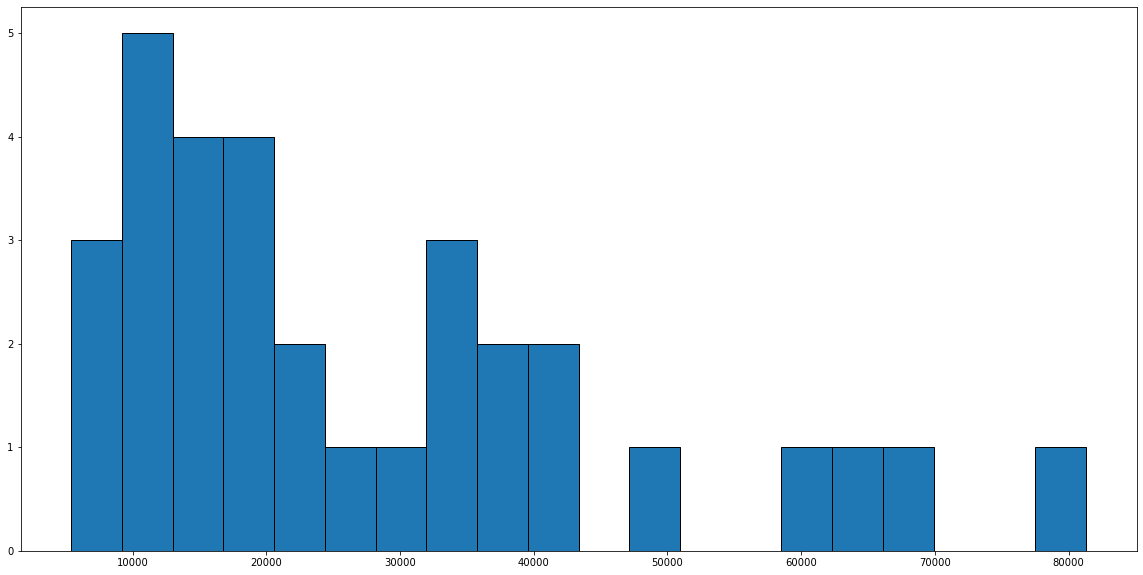

In [103]:
df1df2['AbsAmount'] = df1df2['Total'].abs()
df1df2_categ_values = pd.cut(df1df2['2020'],4)
df1df2

bins=20

fig = plt.subplots(figsize=(20,10))
sort = df1df2.sort_values(by=['2020'])
plt.hist(sort['2020'],bins, edgecolor='black')

plt.show()

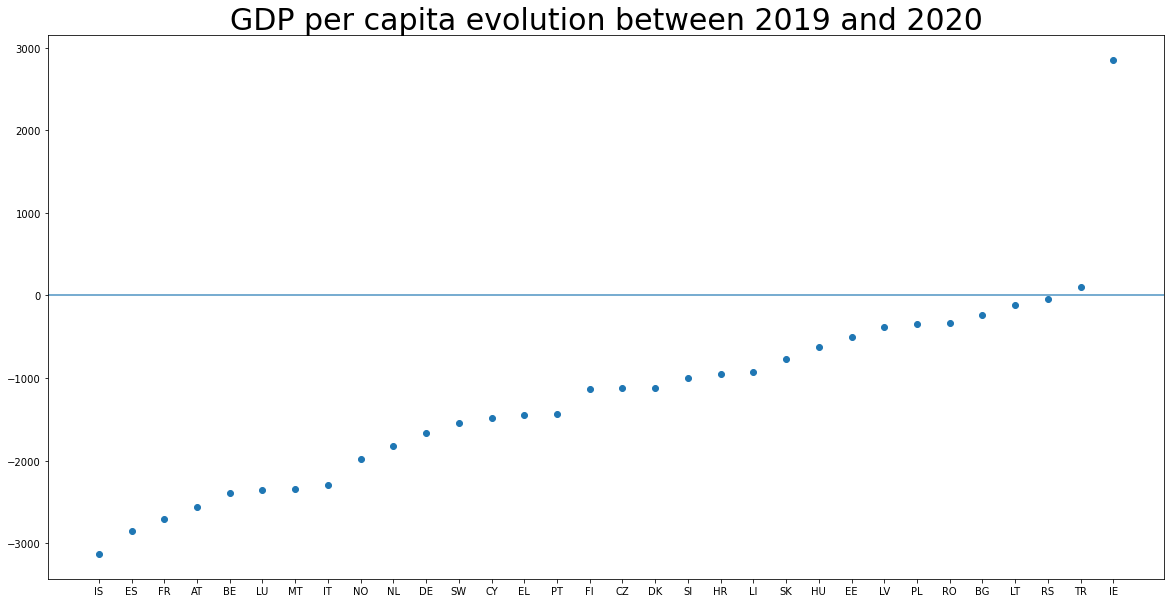

In [30]:
fig = plt.subplots(figsize=(20,10))
plt.axhline(y=0,alpha=0.8)

df1df2.sort_values(by=['Total'], inplace=True)

plt.scatter(df1df2['CountryID'],df1df2['Total'])
plt.title(label='GDP per capita evolution between 2019 and 2020', loc='center', fontdict={'fontsize':30})
plt.show()

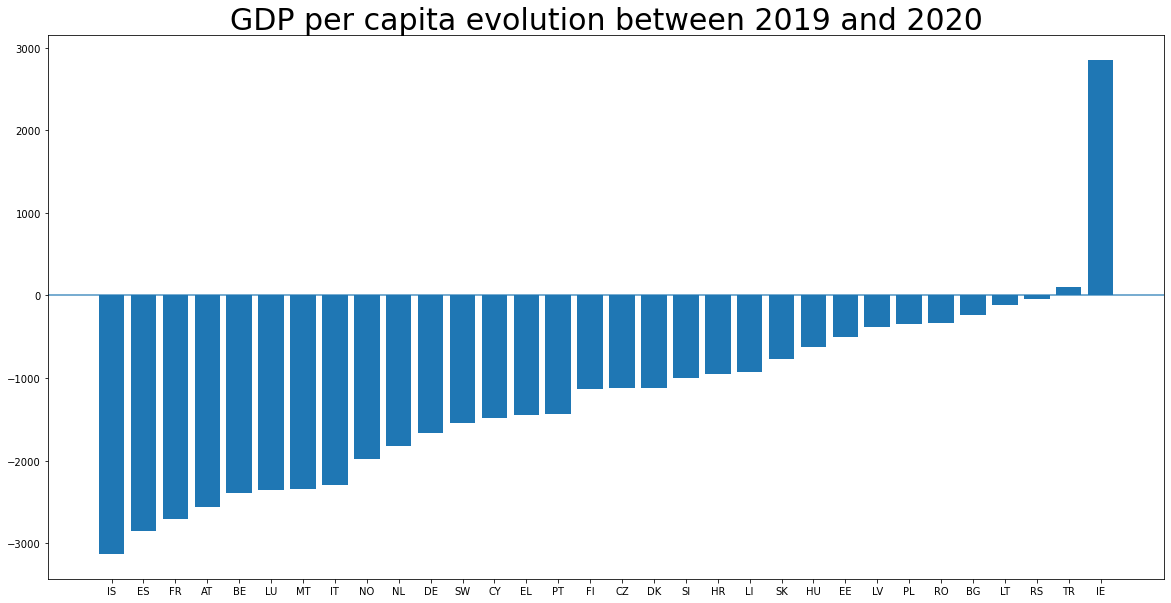

In [31]:
fig = plt.subplots(figsize=(20,10))
plt.axhline(y=0,alpha=0.8)
plt.bar(df1df2['CountryID'],df1df2['Total'])
plt.title(label='GDP per capita evolution between 2019 and 2020', loc='center', fontdict={'fontsize':30})
plt.show()